# NLP and Speech Recognition Course-end Project 2
# Identify hate speech (racist or sexist tweets) in Twitter

### DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

### Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

**Domain:** Social Media

**Analysis to be done:** Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

#### Content: 

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

### Tasks: 

1. Load the tweets file using read_csv function from Pandas package. 
2. Get the tweets into a list for easy text cleanup and manipulation.
3. To cleanup: 
   1. Normalize the casing.
   2. Using regular expressions, remove user handles. These begin with '@’.
   3. Using regular expressions, remove URLs.
   4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
   5. Remove stop words.
   6. Remove redundant terms like ‘amp’, ‘rt’, etc.
   7. Remove ‘#’ symbols from the tweet while retaining the term.
4. Extra cleanup by removing terms with a length of 1.
5. Check out the top terms in the tweets:
    1. First, get all the tokenized terms into one large list.
    2. Use the counter and find the 10 most common terms.
6. Data formatting for predictive modeling:
    1. Join the tokens back to form strings. This will be required for the vectorizers.
    2. Assign x and y.
    3. Perform train_test_split using sklearn.
7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model.
    1. Import TF-IDF  vectorizer from sklearn.
    2. Instantiate with a maximum of 5000 terms in your vocabulary.
    3. Fit and apply on the train set.
    4. Apply on the test set.
8. Model building: Ordinary Logistic Regression
    1. Instantiate Logistic Regression from sklearn with default parameters.
    2. Fit into  the train data.
    3. Make predictions for the train and the test set.    
9. Model evaluation: Accuracy, recall, and f_1 score.
    1. Report the accuracy on the train set.
    2. Report the recall on the train set: decent, high, or low.
    3. Get the f1 score on the train set.
10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
    1. Adjust the appropriate class in the LogisticRegression model.
11. Train again with the adjustment and evaluate.
    1. Train the model on the train set.
    2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.
12. Regularization and Hyperparameter tuning:
    1. Import GridSearch and StratifiedKFold because of class imbalance.
    2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
    3. Use a balanced class weight while instantiating the logistic regression.
13. Find the parameters with the best recall in cross-validation.
    1. Choose ‘recall’ as the metric for scoring.
    2. Choose a stratified 4 fold cross-validation scheme.
    3. Fit into  the train set.
14. What are the best parameters?
15. Predict and evaluate using the best estimator.
    1. Use the best estimator from the grid search to make predictions on the test set.
    2. What is the recall on the test set for the toxic comments?
    3. What is the f_1 score?


In [1]:
# import libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## import for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Python Libraries
import re        # Regular Expressions
import string    # String

sbold = '\033[1m' # Python format tag to start bold font setting
ebold = '\033[0m' # Python format tag to end bold font setting

### 1. Load the tweets file using read_csv function from Pandas package

In [2]:
# Load the tweets file using Pandas read_csv function

df_tweets = pd.read_csv("TwitterHate.csv")

# Display the number of records in the dataset
print(sbold + 'Number of tweets in the dataset:' + ebold, df_tweets.shape[0])
print()

# Show the first 5 rows
df_tweets.head()

Number of tweets in the dataset: 31962



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# Check the feature information of the dataset
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
# Check the unique value counts for the 'label' 
df_tweets['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

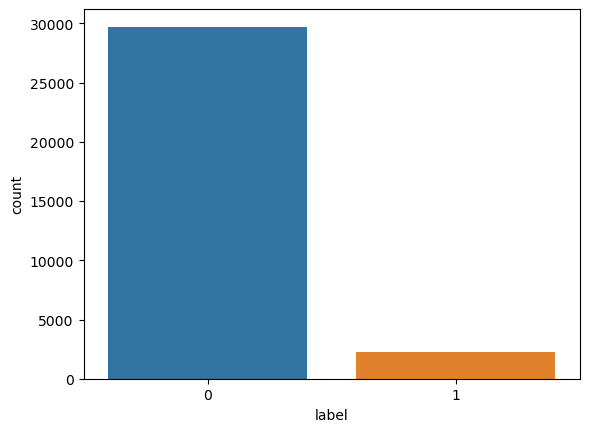

In [5]:
# Plot the values
sns.countplot(x='label', data=df_tweets);

#### Observations:
- There are 31,962 tweets in the dataset
- There are 92.98% `non-hate (0)` and 7.01% `hate (1)` tweets  

### 2. Get the tweets into a list for easy text cleanup and manipulation.

In [6]:
# Get the tweets into a list of strings 
tweets = list(df_tweets['tweet'].values)

print(sbold + "Number of tweets:" + ebold, len(tweets))

# Show the first 3 tweets
tweets[:3]

Number of tweets: 31962


[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

### 3. To cleanup:
1. Normalize the casing.
2. Using regular expressions, remove user handles. These begin with '@’.
3. Using regular expressions, remove URLs.
4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
5. Remove stop words.
6. Remove redundant terms like ‘amp’, ‘rt’, etc.
7. Remove ‘#’ symbols from the tweet while retaining the term.

In [7]:
# 1. Normalize the casing
tweets_lower = [s.lower() for s in tweets]

# Show that the first 3. tweets had been changed to lowercase
tweets_lower[:3]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

In [8]:
# 2. Using regular expressions, remove user handles. These begin with '@’.
tweets_removed_user = [re.sub('@\w+', '', twt) for twt in tweets_lower]

# Reshow the first 3 sentences to check that @user had been removed
tweets_removed_user[:3]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty']

In [9]:
# Check the possible URLs that need to be removed
def checkURLs(tweets):
    for sent in tweets:
        if '.com ' in sent or 'http' in sent or ' www.' in sent or '.org' in sent or '.edu' in sent:
            print(sent)
    print(sbold + 'Finish checking for possible URLs' + ebold)      
checkURLs(tweets_removed_user)

#fly   #and #better #with #us #buranus  #www.flybcc.com #call #7/24  #airbroker #flightâ¦ 
  live right noww!!!!!!!!!!!! #vocal voyage 2-4pm (gmt) #sweet reggae music #realbuzzradio.com    fatherâ¦
  couple having sex www.drunk singapore girl get fuck   
so glad my #workout includes smoke breaks...www.smokeweedeatbacon.com #weed #bacon #fitness #sex #health #marijuana   #strength #living
  just run 10kms for     #loveisall  pour donner: www.alvarum/heloiseetlespremas 
when i grow up......... #jw #jw.org #bestlifeever #love   #smile #avery 
 fathersdayquotes  #father's #day #quotes #from #daughter #| #sayingimages.com â¦  
check    father's day, psst mom dad wants...shoprsnet.com - #fashion up for less!  ...
#psychic truth:what changes do i need to make in my life to be   ?   let's look..balancedenergie.com 
Finish checking for possible URLs


The possible URLs in the tweets of the current dataset are:
- #www.flybcc.com
- #realbuzzradio.com
- www.drunk
- www.smokeweedeatbacon.com
- www.alvarum/heloiseetlespremas 
- #jw.org
- #sayingimages.com
- shoprsnet.com
- balancedenergie.com

It looks like most possible URLs in the tweets of the current dataset are usually either start with ' www.' or ends with '.com' or 'org'

The possible 'http://' or 'https://' that are part of URLs are not in the current set of data but will need to be also considered when removing URLs from tweets.

In [10]:
# 3. Using regular expressions, remove URLs.
def removeURLs(tweets):
    cleaned_tweets = []
    for sent in tweets:
        if 'http' in sent:
            twt = re.sub('\w+://\S+', '', sent)
        elif 'www.' in sent:
            twt = re.sub('[w]{3}\.\S+', '', sent)
        else:
            twt = re.sub('\w+(\.{1}\w{2,3})+\S+', '', sent)
            
        cleaned_tweets.append(twt)
        
    return cleaned_tweets

In [11]:
# Remove URLs from tweets
tweets_no_URLs = removeURLs(tweets_removed_user)

# Check to see if there are any tweets with URL formats (if nothing then no print out)
checkURLs(tweets_no_URLs)

Finish checking for possible URLs


In [12]:
# 4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
tk = TweetTokenizer()
tweets_tokenized = [tk.tokenize(tweet) for tweet in tweets_no_URLs]
print(sbold + 'Number of tokenized tweets:' + ebold, len(tweets_tokenized))
print(sbold + 'First 3 tokenized tweets:' + ebold)
print(tweets_tokenized[:3])
      

Number of tokenized tweets: 31962
First 3 tokenized tweets:
[['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run'], ['thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx', '.', '#disapointed', '#getthanked'], ['bihday', 'your', 'majesty']]


In [13]:
# 5. Remove stop words.
## Get punctuations to add to stop words 
punctuations = list(string.punctuation)

## Get list of 'english' stopwords and update with punctuation
stop_words = set(stopwords.words('english'))
stop_words.update(punctuations)

cleaned_tweets = []

for sent in tweets_tokenized:
    tokens = [word for word in sent if word not in stop_words]
    cleaned_tweets.append(tokens)
    

In [14]:
# Show the first 5 tweets before and after applying stopwords
print(sbold + 'Before using stopwords on tweets:' + ebold)
print(tweets_tokenized[:5])
print(sbold + 'After using stopwords on tweets:' + ebold)
print(cleaned_tweets[:5])

Before using stopwords on tweets:
[['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run'], ['thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx', '.', '#disapointed', '#getthanked'], ['bihday', 'your', 'majesty'], ['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð', '\x9f', '\x93', '±', '!', '!', '!', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð', '\x9f', '\x91', '\x84', 'ð', '\x9f', '\x91', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦'], ['factsguide', ':', 'society', 'now', '#motivation']]
After using stopwords on tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '#run'], ['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '#disapointed', '#getthanked'], ['bihday', 'majes

In [15]:
# 6. Remove redundant terms like ‘amp’, ‘rt’, etc.
redundant_terms = ['amp', 'rt', 'urð', '&amp', '&gt', '&lt', 'etc']

clean_tweets = []
for sent in cleaned_tweets:
    tokens = [word for word in sent if word not in redundant_terms]
    clean_tweets.append(tokens)

print(sbold + 'Before removing redundant terms from tokens in tweets:' + ebold)
print(cleaned_tweets[:5])
print(sbold + 'After removing redundant terms from tokens in tweets:' + ebold)
print(clean_tweets[:5])        

Before removing redundant terms from tokens in tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '#run'], ['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '#disapointed', '#getthanked'], ['bihday', 'majesty'], ['#model', 'love', 'u', 'take', 'u', 'time', 'urð', '\x9f', '\x93', '±', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð', '\x9f', '\x91', '\x84', 'ð', '\x9f', '\x91', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦'], ['factsguide', 'society', '#motivation']]
After removing redundant terms from tokens in tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '#run'], ['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '#disapointed', '#getthanked'], ['bihday', 'majesty'], ['#model', 'love', 'u', 'take', 'u', 'time', '\x9f', '\x93', '±', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð', '\

In [16]:
# 7. Remove ‘#’ symbols from the tweet while retaining the term
tweets_no_hash = []
for sent in clean_tweets:
    tokens_no_hash = [re.sub('#', '', word) for word in sent]
    tweets_no_hash.append(tokens_no_hash)
    
print(sbold + 'Before removing # from tokens in tweets:' + ebold)
print(cleaned_tweets[:3])
print(sbold + 'After removing # from tokens in tweets:' + ebold)
print(tweets_no_hash[:3])

Before removing # from tokens in tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', '#run'], ['thanks', '#lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', '#disapointed', '#getthanked'], ['bihday', 'majesty']]
After removing # from tokens in tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'], ['thanks', 'lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'], ['bihday', 'majesty']]


### 4. Extra cleanup by removing terms with a length of 1.
- After cleaning `#`, let's run the stopwords again in the list to see if more stopwords can be removed before removing terms with a length of 1.

In [17]:
# After cleaning `#`, let's run the stopwords again in the list to see if more stopwords can be removed

# Add `...` and `..` to the stopwords
stop_words.update(["...", "..", "i'm"])

tweets_removed_stopwords = []

for sent in tweets_no_hash:
    tokens = [word for word in sent if word not in stop_words]
    tweets_removed_stopwords.append(tokens)

In [18]:
# Removing terms with a length of 1
tweets_clean = []

for sent in tweets_removed_stopwords:
    tokens = [word for word in sent if (len(word) > 1) and not(word.isnumeric())]
    tweets_clean.append(tokens)
    
print(sbold + 'Before removing terms with length of 1 from tweets:' + ebold)
print(tweets_removed_stopwords[:5])
print(sbold + 'After removing terms with length of 1 from tweets:' + ebold)
print(tweets_clean[:5])

Before removing terms with length of 1 from tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'], ['thanks', 'lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'], ['bihday', 'majesty'], ['model', 'love', 'u', 'take', 'u', 'time', '\x9f', '\x93', '±', 'ð', '\x9f', '\x98', '\x99', 'ð', '\x9f', '\x98', '\x8e', 'ð', '\x9f', '\x91', '\x84', 'ð', '\x9f', '\x91', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦', 'ð', '\x9f', '\x92', '¦'], ['factsguide', 'society', 'motivation']]
After removing terms with length of 1 from tweets:
[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'], ['thanks', 'lyft', 'credit', "can't", 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'], ['bihday', 'majesty'], ['model', 'love', 'take', 'time'], ['factsguide', 'society', 'motivation']]


### 5. Check out the top terms in the tweets:
1. First, get all the tokenized terms into one large list.
2. Use the counter and find the 10 most common terms.

In [19]:
# 1. Convert the tokenized tweets into one large list (Bag Of Words)
all_tokens = []

for sent in tweets_clean:
    all_tokens.extend(sent)
    
print(sbold + 'Number of tokens in Bag of Words:' + ebold, len(all_tokens))
all_tokens[:10]

Number of tokens in Bag of Words: 246724


['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'thanks',
 'lyft',
 'credit']

In [20]:
# 2. Use the counter and find the 10 most common terms

from collections import Counter

termsCount = Counter(all_tokens)
print(sbold + 'The 10 most common terms are:' + ebold)
termsCount.most_common(10)

The 10 most common terms are:


[('love', 2747),
 ('day', 2275),
 ('happy', 1684),
 ('time', 1131),
 ('life', 1118),
 ('like', 1047),
 ('today', 1012),
 ('new', 994),
 ('thankful', 946),
 ('positive', 931)]

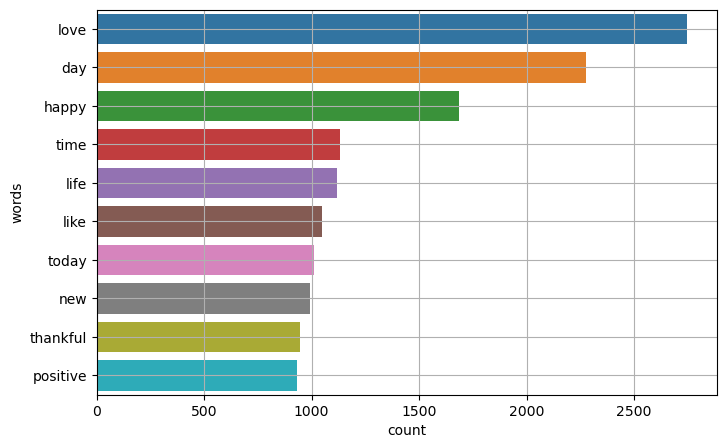

In [21]:
## Plot the top most common word occurrence

# Create a dictionary from the first 15 most common word counts 
top_words_dict = {word:count for word, count in termsCount.most_common(10)}

# Create a DataFrame with the words and count dictionary
df_top_words = pd.DataFrame({'words':list(top_words_dict.keys()), 'count':list(top_words_dict.values())})
df_top_words                             

# Plot the bar chart showing the most common word counts
plt.figure(figsize=[8,5])
sns.barplot(data=df_top_words, x='count', y='words').grid();

### Show most common words as WordCloud

In [22]:
## Combine the content of all of the tokens into one string
all_text = ' '.join(word for word in all_tokens)

# Show that the tokens are now joined as one string
all_text[:128]


"father dysfunctional selfish drags kids dysfunction run thanks lyft credit can't use cause offer wheelchair vans pdx disapointed"

In [23]:
## Create wordcloud object
wordcloud = WordCloud(colormap='coolwarm', background_color='black').generate(all_text)


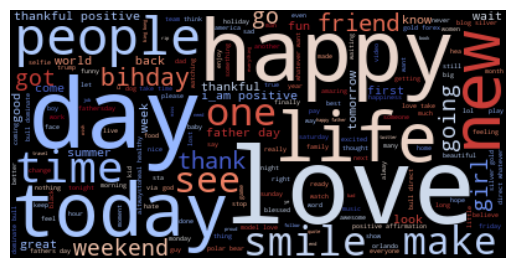

In [24]:
## Visualize wordcloud object
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 6. Data formatting for predictive modeling:
1. Join the tokens back to form strings. This will be required for the vectorizers.
2. Assign x and y.
3. Perform train_test_split using sklearn.

In [25]:
# 6.1 Join the tokens back to form strings.

tweet_strings = [" ".join(sent) for sent in tweets_clean]
print(sbold + "The cleaned tokenized tweets are converted back into string format (showing first 3 tweets):" + ebold) 
print(tweet_strings[:3])

print(sbold + "\nNumber of tweets are:" + ebold, len(tweet_strings))

The cleaned tokenized tweets are converted back into string format (showing first 3 tweets):
['father dysfunctional selfish drags kids dysfunction run', "thanks lyft credit can't use cause offer wheelchair vans pdx disapointed getthanked", 'bihday majesty']

Number of tweets are: 31962


### Remove any empty tweets after cleaned up before assigning to X and y

In [26]:
# 6.2 Assign x and y

X = []
y = []

# Get the labels from the original dataset
y_lst = list(df_tweets['label'].values)

# Check to make sure that the tweet string is not empty before assigning to X
# Only take the corresponding y value for the tweets
for i in range(len(tweet_strings)):
    if len(tweet_strings[i]) > 0:
        X.append(tweet_strings[i])
        y.append(y_lst[i])
        
# Validation check to make sure the number of rows in the dataset are in sync
print(sbold + "Length of tweet_strings:   " + ebold, len(tweet_strings), sbold + "Length of X:" + ebold, len(X))
print(sbold + "Length of labels in dframe:" + ebold, len(y_lst), sbold + "Length of y:" + ebold, len(y))
    

Length of tweet_strings:    31962 Length of X: 31932
Length of labels in dframe: 31962 Length of y: 31932


In [27]:
# 6.3 Perform train_test_split using sklearn

from sklearn.model_selection import train_test_split

# Split the train/test dataset with 80/20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model.
1. Import TF-IDF vectorizer from sklearn.
2. Instantiate with a maximum of 5000 terms in your vocabulary.
3. Fit and apply on the train set.
4. Apply on the test set.

In [28]:
# 71. Import TF-IDF vectorizer from sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# 7.2 Instantiate with a maximum of 5000 terms in your vocabulary
vectorizer = TfidfVectorizer(max_features=5000)

In [30]:
# 7.3 Fit and apply on the train set
X_train_tfidf = vectorizer.fit_transform(X_train)

In [31]:
# 7.4 Apply on the test set
X_test_tfidf = vectorizer.transform(X_test)

### 8. Model building: Ordinary Logistic Regression
1. Instantiate Logistic Regression from sklearn with default parameters.
2. Fit into the train data.
3. Make predictions for the train and the test set. 

In [32]:
# 8.1 Instantiate Logistic Regression from sklearn with default parameters.
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

In [33]:
# 8.2 Fit into the train data

reg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [34]:
# 8.3 Make predictions for the train and the test set.

y_train_pred = reg.predict(X_train_tfidf)

y_test_pred = reg.predict(X_test_tfidf)

### 9. Model evaluation: Accuracy, recall, and f_1 score.
1. Report the accuracy on the train set.
2. Report the recall on the train set: decent, high, or low.
3. Get the f1 score on the train set.

In [35]:
# 9.1 Report the accuracy on the train set

from sklearn.metrics import accuracy_score, classification_report

print(sbold + 'Accuracy Score is:' + ebold)
accuracy_score(y_train, y_train_pred)

Accuracy Score is:


0.9558034840477588

In [36]:
# 9.2 Report the recall on the train set
from sklearn.metrics import recall_score

rscore = recall_score(y_train, y_train_pred)

print(sbold + "Recall score:" + ebold, "%.4f" % rscore)


Recall score: 0.3901


In [37]:
# 9.3 Get the f1 score on the train set
from sklearn.metrics import f1_score

f1score = f1_score(y_train, y_train_pred)

print(sbold + "F-1 score:   " + ebold, "%.4f" % f1score)

F-1 score:    0.5522


In [38]:
# Both recall and f1-score can be seen also in the classification report

print(sbold + 'Showing the recall and f1-score from the classification report' + ebold)
print(classification_report(y_train, y_train_pred))

Showing the recall and f1-score from the classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23761
           1       0.94      0.39      0.55      1784

    accuracy                           0.96     25545
   macro avg       0.95      0.69      0.76     25545
weighted avg       0.96      0.96      0.95     25545



### 10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.
1. Adjust the appropriate class in the LogisticRegression model.

In [39]:
# 10.1 Adjust the appropriate class in the LogisticRegression model

log_reg = LogisticRegression(class_weight='balanced')

### 11. Train again with the adjustment and evaluate.
1. Train the model on the train set.
2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

In [40]:
# 11.1 Train the model on the train set

log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

In [41]:
# 11.2 Evaluate the predictions on the train set: accuracy, recall and f_1 score

y_train_pred_bal = log_reg.predict(X_train_tfidf)

print(sbold + "Accuracy Score:" + ebold, accuracy_score(y_train, y_train_pred_bal))

print(sbold + "\nRecall Score:" + ebold, recall_score(y_train, y_train_pred_bal))

print(sbold + "\nF1 Score:" + ebold, f1_score(y_train, y_train_pred_bal))
    
print(sbold + "\nClassification Report showing recall and f1-score:" + ebold)
print(classification_report(y_train, y_train_pred_bal))

Accuracy Score: 0.9480133098453709

Recall Score: 0.969170403587444

F1 Score: 0.722524028416214

Classification Report showing recall and f1-score:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23761
           1       0.58      0.97      0.72      1784

    accuracy                           0.95     25545
   macro avg       0.79      0.96      0.85     25545
weighted avg       0.97      0.95      0.95     25545



### 12. Regularization and Hyperparameter tuning:
1. Import GridSearch and StratifiedKFold because of class imbalance.
2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
3. Use a balanced class weight while instantiating the logistic regression.

In [42]:
# 12.1 Import GridSearch and StratifiedKFold because of class imbalance

from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [43]:
# 12.2 Provide the parameter grid to choose for 'C' and 'penalty' parameters

param_grid = [
  {'C': [0.01,0.1,1,10,100], 'penalty': ['l1', 'l2']}
 ]

In [44]:
# 12.3 Use a balanced class weight while instantiating the logistic regression

logReg = LogisticRegression(solver='liblinear', class_weight="balanced")


### 13. Find the parameters with the best recall in cross-validation.
1. Choose ‘recall’ as the metric for scoring.
2. Choose a stratified 4 fold cross-validation scheme.
3. Fit into the train set.

In [45]:
# 13.1 Choose 'recall' as the metric for scoring
# 13.2 Choose a stratified 4 fold cross-validation scheme

grid_search = GridSearchCV(estimator=logReg, 
                           param_grid = param_grid,
                           scoring='recall', 
                           n_jobs=-1, 
                           cv=StratifiedKFold(4), 
                           verbose=1)

In [46]:
# 13.3 Fit the train set

grid_search.fit(X_train_tfidf, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1', 'l2']}],
             scoring='recall', verbose=1)

### 14. What are the best parameters?

In [47]:
# The best parameters are:

grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

### 15. Predict and evaluate using the best estimator.
1. Use the best estimator from the grid search to make predictions on the test set.
2. What is the recall on the test set for the toxic comments?
3. What is the f_1 score?

In [48]:
# The best estimator

grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [49]:
# 15.1 Use the best estimator from the grid search to make predictions on the test set

y_test_pred_gs = grid_search.best_estimator_.predict(X_test_tfidf)

In [50]:
# 15.2 What is the recall on the test set for the toxic comments?

print(sbold + "Recall from the Grid Search result:" + ebold) 
print(sbold + "The recall for the toxic comments is:" + ebold, "%.4f" % grid_search.score(X_test_tfidf, y_test))

# Get the recall score 
r_score = recall_score(y_test, y_test_pred_gs)

print(sbold + "\nRecall score from sklearn.metrics:" + ebold)
print(sbold + "Recall score:" + ebold, "%.4f" % r_score)


Recall from the Grid Search result:
The recall for the toxic comments is: 0.7763

Recall score from sklearn.metrics:
Recall score: 0.7763


In [51]:
# 15.3 What is the f_1 score?

f_1_score = f1_score(y_test, y_test_pred_gs)
print(sbold + "F-1 score:   " + ebold, "%.4f" % f_1_score)


F-1 score:    0.5866


In [52]:
# Showing the recall and f-1 scores as classification report

print(classification_report(y_test, y_test_pred_gs))


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5931
           1       0.47      0.78      0.59       456

    accuracy                           0.92      6387
   macro avg       0.73      0.85      0.77      6387
weighted avg       0.95      0.92      0.93      6387



<b><center>End of Project</center></b>